In [0]:
from __future__ import absolute_import, division, print_function,  unicode_literals
import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
keras =tf.keras

In [0]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [0]:
SPLIT_WEIGTHS = (8,1,1)
splits =tfds.Split.TRAIN.subsplit(weighted=SPLIT_WEIGTHS)
(raw_train,raw_validation,raw_test),metadata=tfds.load('cats_vs_dogs',split=list(splits),with_info=True,as_supervised=True)

In [108]:
print(raw_train)
print(raw_validation)
print(raw_test)

<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


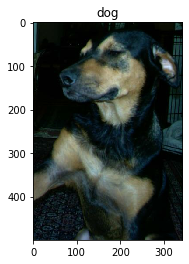

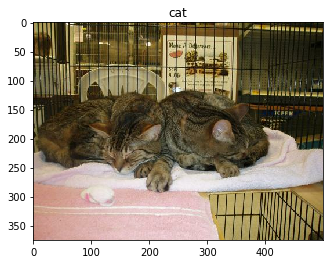

In [109]:
get_label_name =metadata.features['label'].int2str
for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [0]:
IMG_SIZE = 160
def format_example(image,label):
  image =tf.cast(image,tf.float32)
  image=(image/127.5)-1
  image=tf.image.resize(image, (IMG_SIZE,IMG_SIZE))
  return image,label

In [0]:
train =raw_train.map(format_example)
validation=raw_validation.map(format_example)
test =raw_test.map(format_example)


In [0]:
BATCH_SIZE=32
SHUFLE_BUFFER_SIZE=1000;